# 分布和概率

```{index} single: Distributions and Probabilities
```

## 概述

在本讲中，我们将使用 Python 快速介绍数据和概率分布。

In [1]:
!pip install --upgrade yfinance  

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import yfinance as yf
import scipy.stats
import seaborn as sns

FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

## 常见分布

在本节中，我们回顾一些众所周知的分布的定义，并探讨如何使用 SciPy 来操作它们。

### 离散分布

我们从离散分布开始。

离散分布由一组数值 $S = \{x_1, \ldots, x_n\}$ 定义，并在 $S$ 上有一个**概率质量函数**（PMF），它是一个从 $S$ 到 $[0,1]$ 的函数 $p$，具有属性

$$ 
\sum_{i=1}^n p(x_i) = 1 
$$

我们说一个随机变量 $X$ **具有分布** $p$，如果 $X$ 以概率 $p(x_i)$ 取值 $x_i$。

即，

$$ 
\mathbb P\{X = x_i\} = p(x_i) \quad \text{对于 } i= 1, \ldots, n 
$$

具有分布 $p$ 的随机变量 $X$ 的**均值**或**期望值**是

$$ 
\mathbb{E}[X] = \sum_{i=1}^n x_i p(x_i)
$$

期望也称为分布的*第一矩*。

我们也将这个数字称为分布（由 $p$ 表示）的均值。

$X$ 的**方差**定义为

$$ 
\mathbb{V}[X] = \sum_{i=1}^n (x_i - \mathbb{E}[X])^2 p(x_i)
$$

方差也称为分布的*第二中心矩*。

$X$ 的**累积分布函数**（CDF）定义为

$$
F(x) = \mathbb{P}\{X \leq x\}
        = \sum_{i=1}^n \mathbb 1\{x_i \leq x\} p(x_i)
$$

这里 $\mathbb 1\{\text{statement} \} = 1$ 如果 "statement" 为真，否则为零。

因此第二项取所有 $x_i \leq x$ 并求它们概率的和。


#### 均匀分布

一个简单的例子是**均匀分布**，其中 $p(x_i) = 1/n$ 对于所有 $i$ 都成立。

我们可以这样从 SciPy 导入 $S = \{1, \ldots, n\}$ 上的均匀分布：

In [3]:
n = 10
u = scipy.stats.randint(1, n+1)

计算均值和方差：

In [4]:
u.mean(), u.var()

(5.5, 8.25)

均值的公式是 $(n+1)/2$，方差的公式是 $(n^2 - 1)/12$。

现在让我们评估 PMF：

In [5]:
u.pmf(1)

0.1

In [6]:
u.pmf(2)

0.1

以下是 PMF 的图：

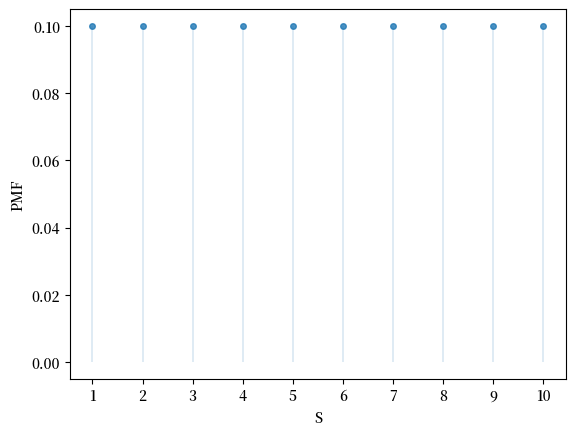

In [7]:
fig, ax = plt.subplots()
S = np.arange(1, n+1)
ax.plot(S, u.pmf(S), linestyle='', marker='o', alpha=0.8, ms=4)
ax.vlines(S, 0, u.pmf(S), lw=0.2)
ax.set_xticks(S)
ax.set_xlabel('S')
ax.set_ylabel('PMF')
plt.show()

这里是 CDF 的图：

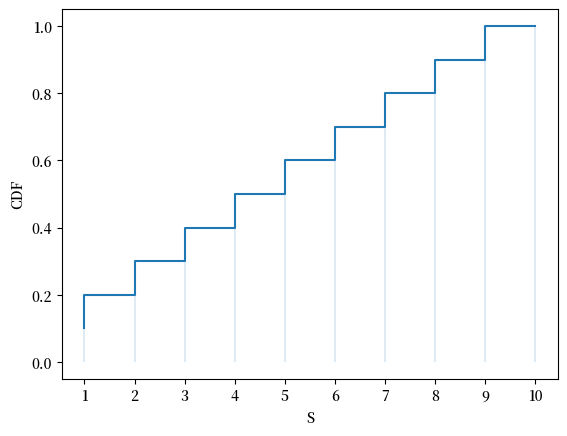

In [8]:
fig, ax = plt.subplots()
S = np.arange(1, n+1)
ax.step(S, u.cdf(S))
ax.vlines(S, 0, u.cdf(S), lw=0.2)
ax.set_xticks(S)
ax.set_xlabel('S')
ax.set_ylabel('CDF')
plt.show()

CDF 在$x_i$处跳升$p(x_i)$。

```{exercise}
:label: prob_ex1

计算这个参数化（即 $n=10$）的均值和方差，直接从 PMF 使用上面给出的公式计算。

验证你的答案与 `u.mean()` 和 `u.var()` 是否一致。
```

#### 伯努利分布

另一个有用的分布是 $S = \{0,1\}$ 上的伯努利分布，其 PMF 是：

$$
p(i) = \theta^i (1 - \theta)^{1-i}
\qquad (i = 0, 1)
$$

这里 $\theta \in [0,1]$ 是一个参数。

我们可以将这个分布视为对一个随机试验进行概率建模，其成功概率是 $\theta$。

* $p(1) = \theta$ 表示试验成功（取值1）的概率是 $\theta$
* $p(0) = 1 - \theta$ 表示试验失败（取值0）的概率是 $1-\theta$

均值的公式是 $\theta$，方差的公式是 $\theta(1-\theta)$。

我们可以这样从 SciPy 导入 $S = \{0,1\}$ 上的伯努利分布：

In [9]:
θ = 0.4
u = scipy.stats.bernoulli(θ)

这是 $\theta=0.4$ 时的均值和方差：

In [10]:
u.mean(), u.var()

(0.4, 0.24)

我们可以评估 PMF 如下：

In [11]:
u.pmf(0), u.pmf(1)

(0.6, 0.4)

#### 二项分布

另一个有用（而且更有趣）的分布是 $S=\{0, \ldots, n\}$ 上的**二项分布**，其 PMF 为：

$$ 
p(i) = \binom{n}{i} \theta^i (1-\theta)^{n-i}
$$

再次强调，$\theta \in [0,1]$ 是一个参数。

$p(i)$ 的解释是：$n$次独立试验中有$i$次成功的概率，每次试验成功的概率为$\theta$。

例如，如果$\theta=0.5$，那么$p(i)$就是$n$次抛掷公平硬币得到$i$次正面的概率。

均值的公式是$n\theta$，方差的公式是$n\theta(1-\theta)$。

现在让我们来探讨一个例子

In [12]:
n = 10
θ = 0.5
u = scipy.stats.binom(n, θ)

根据我们的公式，均值和方差是

In [13]:
n * θ,  n *  θ * (1 - θ)  

(5.0, 2.5)

让我们看看SciPy是否给出了相同的结果：

In [14]:
u.mean(), u.var()

(5.0, 2.5)

这是 PMF：

In [15]:
u.pmf(1)

0.009765625000000002

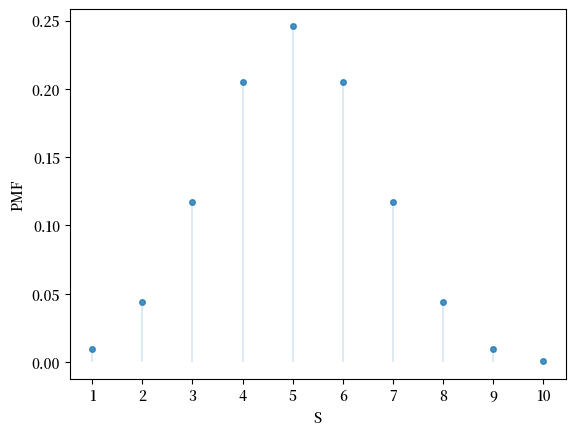

In [16]:
fig, ax = plt.subplots()
S = np.arange(1, n+1)
ax.plot(S, u.pmf(S), linestyle='', marker='o', alpha=0.8, ms=4)
ax.vlines(S, 0, u.pmf(S), lw=0.2)
ax.set_xticks(S)
ax.set_xlabel('S')
ax.set_ylabel('PMF')
plt.show()

这是 CDF：

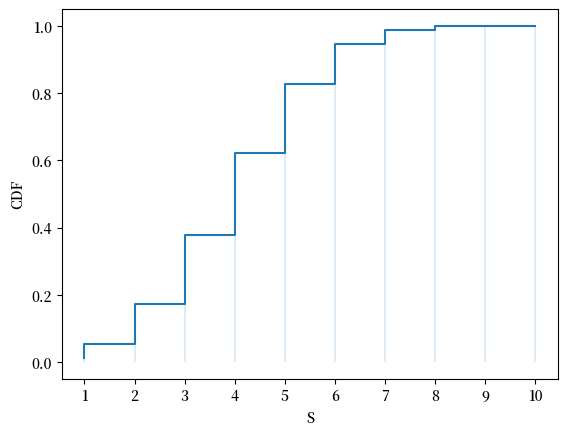

In [17]:
fig, ax = plt.subplots()
S = np.arange(1, n+1)
ax.step(S, u.cdf(S))
ax.vlines(S, 0, u.cdf(S), lw=0.2)
ax.set_xticks(S)
ax.set_xlabel('S')
ax.set_ylabel('CDF')
plt.show()

```{exercise}
:label: prob_ex3

使用`u.pmf`，验证我们上面给出的CDF定义是否计算出与`u.cdf`相同的函数。
```

```{solution-start} prob_ex3
:class: dropdown
```

这里是一个解决方案：

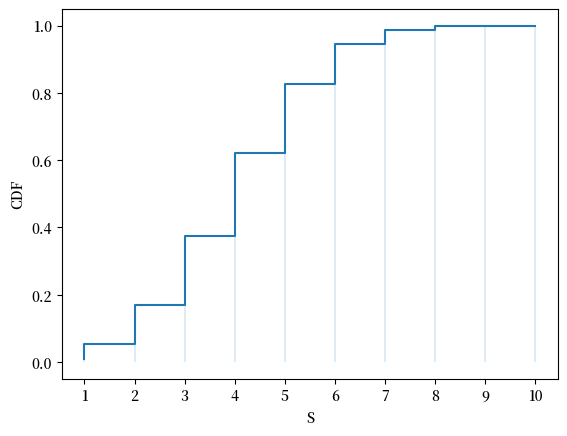

In [18]:
fig, ax = plt.subplots()
S = np.arange(1, n+1)
u_sum = np.cumsum(u.pmf(S))
ax.step(S, u_sum)
ax.vlines(S, 0, u_sum, lw=0.2)
ax.set_xticks(S)
ax.set_xlabel('S')
ax.set_ylabel('CDF')
plt.show()

我们可以看到输出图与上面的相同。

```{solution-end}
```

#### 几何分布

几何分布具有无限支持集 $S = \{0, 1, 2, \ldots\}$，其概率质量函数（PMF）为

$$
p(i) = (1 - \theta)^i \theta
$$

其中 $\theta \in [0,1]$ 是一个参数

（如果一个离散分布赋予正概率的点集是无限的，则称其具有无限支持。）

为了理解这个分布，可以想象重复的独立随机试验，每次试验的成功概率为 $\theta$。

$p(i)$ 的解释是：第一次成功之前发生了 $i$ 次失败的概率。

可以证明该分布的平均值是 $1/\theta$，方差是 $(1-\theta)/\theta$。

下面是一个例子。

In [19]:
θ = 0.1
u = scipy.stats.geom(θ)
u.mean(), u.var()

(10.0, 90.0)

这里是部分PMF：

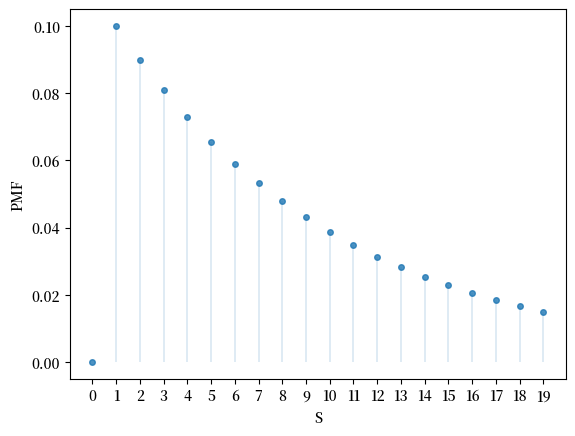

In [20]:
fig, ax = plt.subplots()
n = 20
S = np.arange(n)
ax.plot(S, u.pmf(S), linestyle='', marker='o', alpha=0.8, ms=4)
ax.vlines(S, 0, u.pmf(S), lw=0.2)
ax.set_xticks(S)
ax.set_xlabel('S')
ax.set_ylabel('PMF')
plt.show()

#### 泊松分布

泊松分布在 $S = \{0, 1, \ldots\}$ 上，参数为 $\lambda > 0$，其概率质量函数（PMF）为

$$
p(i) = \frac{\lambda^i}{i!} e^{-\lambda}
$$

$p(i)$ 的解释是：在固定时间区间内事件发生 $i$ 次的概率，其中事件以常数率 $\lambda$ 独立发生。

可以证明，其均值为 $\lambda$，方差也为 $\lambda$。

这里有一个例子。

In [21]:
λ = 2
u = scipy.stats.poisson(λ)
u.mean(), u.var()

(2.0, 2.0)

这是概率质量函数：

In [22]:
u.pmf(1)

0.2706705664732254

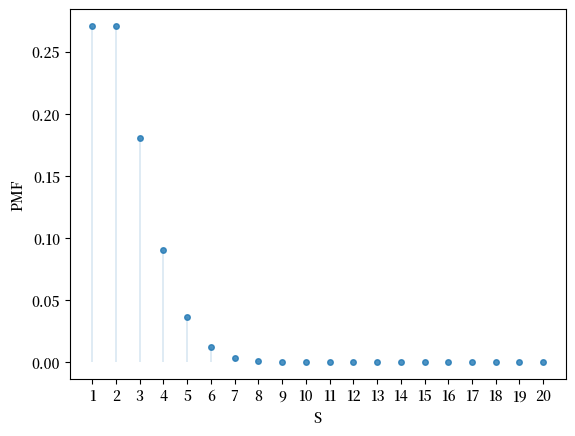

In [23]:
fig, ax = plt.subplots()
S = np.arange(1, n+1)
ax.plot(S, u.pmf(S), linestyle='', marker='o', alpha=0.8, ms=4)
ax.vlines(S, 0, u.pmf(S), lw=0.2)
ax.set_xticks(S)
ax.set_xlabel('S')
ax.set_ylabel('PMF')
plt.show()

### 连续分布

连续分布由一个**概率密度函数**表示，这是一个在全体实数集 $\mathbb R$ 上的函数 $p$，满足对所有的 $x$ 有 $p(x) \geq 0$，并且

$$ 
\int_{-\infty}^\infty p(x) \, dx = 1 
$$

我们说随机变量 $X$ 若有如下性质则服从分布 $p$：

$$
\mathbb P\{a < X < b\} = \int_a^b p(x) \, dx
$$

对所有 $a \leq b$ 都成立。

随机变量 $X$ 若服从分布 $p$，其均值和方差的定义与离散情况相同，只是将求和换成了积分。

例如，$X$ 的均值为

$$
\mathbb{E}[X] = \int_{-\infty}^\infty x p(x) \, dx
$$

$X$ 的**累积分布函数**（CDF）定义为

$$
F(x) = \mathbb P\{X \leq x\}
        = \int_{-\infty}^x p(x) \, dx
$$


#### 正态分布

也许最著名的分布是**正态分布**，其密度为

$$
p(x) = \frac{1}{\sqrt{2\pi}\sigma}
            \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

这个分布有两个参数，$\mu \in \mathbb R$ 和 $\sigma \in (0, \infty)$。

使用微积分，可以证明对于这种分布，均值是 $\mu$，方差是 $\sigma^2$。

我们可以通过 SciPy 获取正态分布的矩、PDF 和 CDF：

In [24]:
μ, σ = 0.0, 1.0
u = scipy.stats.norm(μ, σ)

In [25]:
u.mean(), u.var()

(0.0, 1.0)

下面是密度的图像——著名的“钟形曲线”：

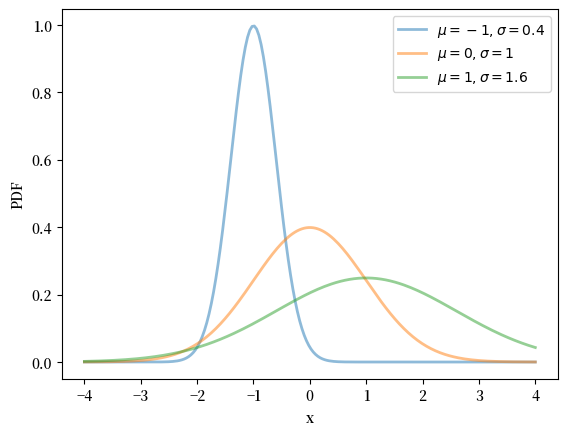

In [26]:
μ_vals = [-1, 0, 1]
σ_vals = [0.4, 1, 1.6]
fig, ax = plt.subplots()
x_grid = np.linspace(-4, 4, 200)

for μ, σ in zip(μ_vals, σ_vals):
    u = scipy.stats.norm(μ, σ)
    ax.plot(x_grid, u.pdf(x_grid),
    alpha=0.5, lw=2,
    label=f'$\mu={μ}, \sigma={σ}$')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
plt.legend()
plt.show()

下面是 CDF 的图像：

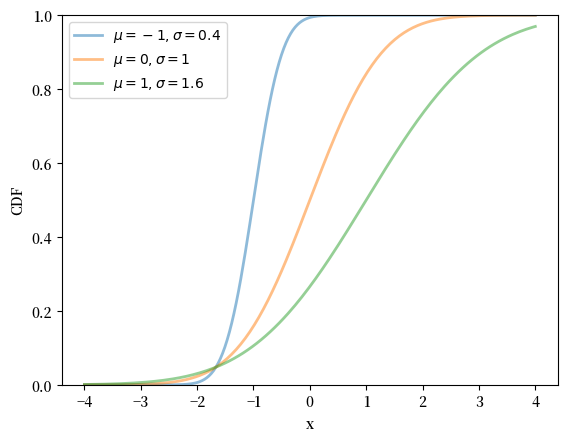

In [27]:
fig, ax = plt.subplots()
for μ, σ in zip(μ_vals, σ_vals):
    u = scipy.stats.norm(μ, σ)
    ax.plot(x_grid, u.cdf(x_grid),
    alpha=0.5, lw=2,
    label=f'$\mu={μ}, \sigma={σ}$')
    ax.set_ylim(0, 1)
ax.set_xlabel('x')
ax.set_ylabel('CDF')
plt.legend()
plt.show()

#### 对数正态分布

**对数正态分布**是定义在 $\left(0, \infty\right)$ 上的一个分布，其密度函数为

$$
p(x) = \frac{1}{\sigma x \sqrt{2\pi}}
    \exp \left(- \frac{\left(\log x - \mu\right)^2}{2 \sigma^2} \right)
$$

这个分布有两个参数，$\mu$ 和 $\sigma$。

可以证明，对于这个分布，平均值是 $\exp\left(\mu + \sigma^2/2\right)$，方差是 $\left[\exp\left(\sigma^2\right) - 1\right] \exp\left(2\mu + \sigma^2\right)$。

可以证明：

* 如果 $X$ 是对数正态分布的，则 $\log X$ 是正态分布的，
* 如果 $X$ 是正态分布的，则 $\exp X$ 是对数正态分布的。

我们可以按照下面的方式获取对数正态分布的矩、PDF 和 CDF：

In [28]:
μ, σ = 0.0, 1.0
u = scipy.stats.lognorm(s=σ, scale=np.exp(μ))

In [29]:
u.mean(), u.var()

(1.6487212707001282, 4.670774270471604)

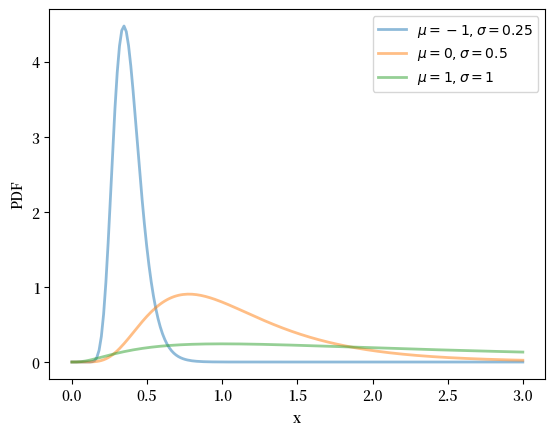

In [30]:
μ_vals = [-1, 0, 1]
σ_vals = [0.25, 0.5, 1]
x_grid = np.linspace(0, 3, 200)

fig, ax = plt.subplots()
for μ, σ in zip(μ_vals, σ_vals):
    u = scipy.stats.lognorm(σ, scale=np.exp(μ))
    ax.plot(x_grid, u.pdf(x_grid),
    alpha=0.5, lw=2,
    label=f'$\mu={μ}, \sigma={σ}$')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
plt.legend()
plt.show()

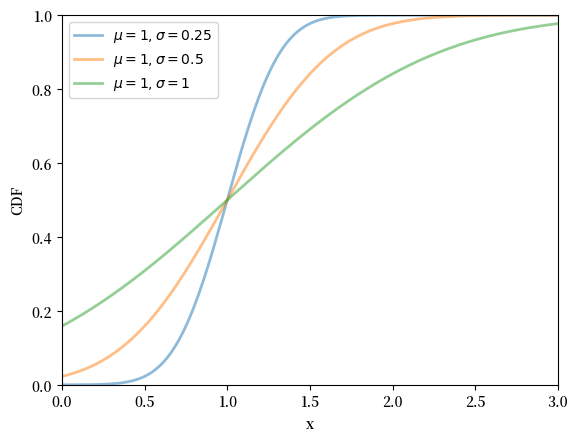

In [31]:
fig, ax = plt.subplots()
μ = 1
for σ in σ_vals:
    u = scipy.stats.norm(μ, σ)
    ax.plot(x_grid, u.cdf(x_grid),
    alpha=0.5, lw=2,
    label=f'$\mu={μ}, \sigma={σ}$')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 3)
ax.set_xlabel('x')
ax.set_ylabel('CDF')
plt.legend()
plt.show()

#### 指数分布

**指数分布**是定义在 $\left(0, \infty\right)$ 上的分布，其密度函数为

$$
p(x) = \lambda \exp \left( - \lambda x \right)
\qquad (x > 0)
$$

这个分布有一个参数 $\lambda$。

指数分布可以被视为几何分布的连续等价物。

可以证明，对于这个分布，平均值是 $1/\lambda$，方差是 $1/\lambda^2$。

我们可以按照下面的方式获取指数分布的矩、PDF 和 CDF：

In [32]:
λ = 1.0
u = scipy.stats.expon(scale=1/λ)

In [33]:
u.mean(), u.var()

(1.0, 1.0)

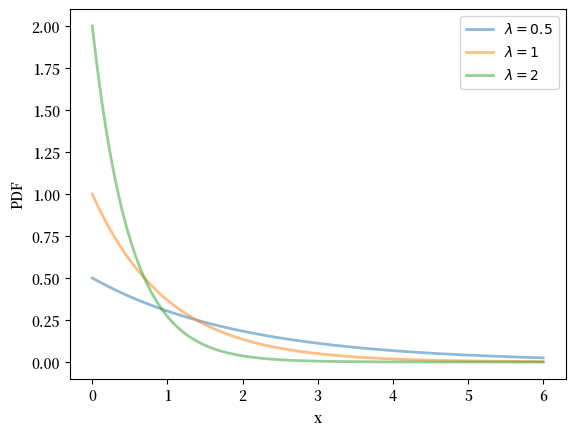

In [34]:
fig, ax = plt.subplots()
λ_vals = [0.5, 1, 2]
x_grid = np.linspace(0, 6, 200)

for λ in λ_vals:
    u = scipy.stats.expon(scale=1/λ)
    ax.plot(x_grid, u.pdf(x_grid),
    alpha=0.5, lw=2,
    label=f'$\lambda={λ}$')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
plt.legend()
plt.show()

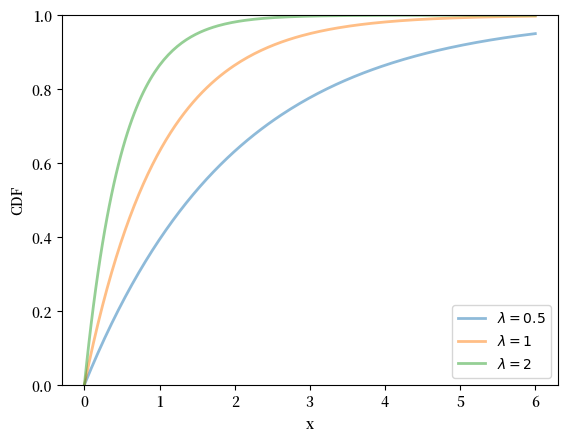

In [35]:
fig, ax = plt.subplots()
for λ in λ_vals:
    u = scipy.stats.expon(scale=1/λ)
    ax.plot(x_grid, u.cdf(x_grid),
    alpha=0.5, lw=2,
    label=f'$\lambda={λ}$')
    ax.set_ylim(0, 1)
ax.set_xlabel('x')
ax.set_ylabel('CDF')
plt.legend()
plt.show()

#### 贝塔分布

**贝塔分布**是定义在 $(0, 1)$ 上的分布，其密度为

$$
p(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)}
    x^{\alpha - 1} (1 - x)^{\beta - 1}
$$

其中 $\Gamma$ 是[伽马函数](https://en.wikipedia.org/wiki/Gamma_function)。

(伽马函数的作用是使密度标准化，从而使其积分为一。)

此分布有两个参数，$\alpha > 0$ 和 $\beta > 0$。

可以证明对于该分布，均值为 $\alpha / (\alpha + \beta)$，方差为 $\alpha \beta / (\alpha + \beta)^2 (\alpha + \beta + 1)$。

我们可以如下获得贝塔密度的矩、PDF 和 CDF：

In [36]:
α, β = 3.0, 1.0
u = scipy.stats.beta(α, β)

In [37]:
u.mean(), u.var()

(0.75, 0.0375)

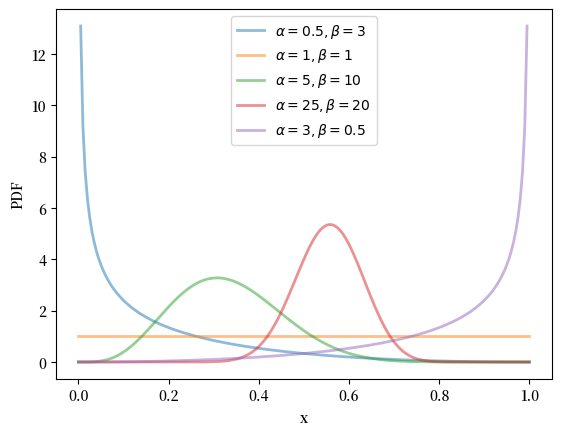

In [38]:
α_vals = [0.5, 1, 5, 25, 3]
β_vals = [3, 1, 10, 20, 0.5]
x_grid = np.linspace(0, 1, 200)

fig, ax = plt.subplots()
for α, β in zip(α_vals, β_vals):
    u = scipy.stats.beta(α, β)
    ax.plot(x_grid, u.pdf(x_grid),
    alpha=0.5, lw=2,
    label=fr'$\alpha={α}, \beta={β}$')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
plt.legend()
plt.show()

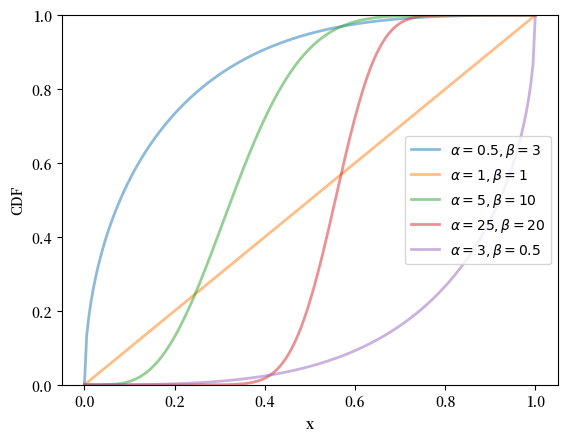

In [39]:
fig, ax = plt.subplots()
for α, β in zip(α_vals, β_vals):
    u = scipy.stats.beta(α, β)
    ax.plot(x_grid, u.cdf(x_grid),
    alpha=0.5, lw=2,
    label=fr'$\alpha={α}, \beta={β}$')
    ax.set_ylim(0, 1)
ax.set_xlabel('x')
ax.set_ylabel('CDF')
plt.legend()
plt.show()

#### 伽马分布

**伽马分布**是定义在 $\left(0, \infty\right)$ 上的分布，其密度为

$$
p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)}
    x^{\alpha - 1} \exp(-\beta x)
$$

此分布有两个参数，$\alpha > 0$ 和 $\beta > 0$。

可以证明对于该分布，均值为 $\alpha / \beta$，方差为 $\alpha / \beta^2$。

一种解释是，如果 $X$ 是伽马分布并且 $\alpha$ 是一个整数，那么 $X$ 是 $\alpha$ 个独立具有均值 $1/\beta$ 的指数分布随机变量的总和。

我们可以如下获得伽马密度的矩、PDF 和 CDF：

In [40]:
α, β = 3.0, 2.0
u = scipy.stats.gamma(α, scale=1/β)

In [41]:
u.mean(), u.var()

(1.5, 0.75)

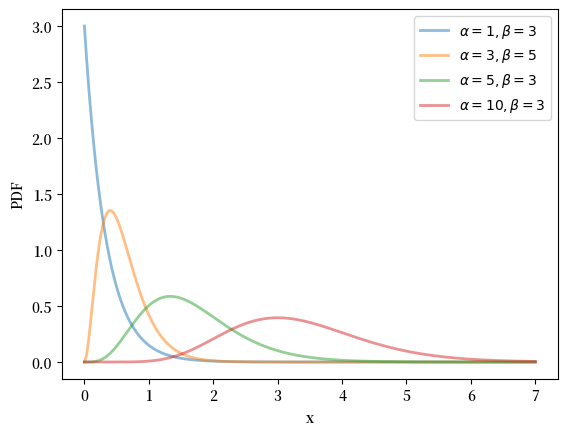

In [42]:
α_vals = [1, 3, 5, 10]
β_vals = [3, 5, 3, 3]
x_grid = np.linspace(0, 7, 200)

fig, ax = plt.subplots()
for α, β in zip(α_vals, β_vals):
    u = scipy.stats.gamma(α, scale=1/β)
    ax.plot(x_grid, u.pdf(x_grid),
    alpha=0.5, lw=2,
    label=fr'$\alpha={α}, \beta={β}$')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
plt.legend()
plt.show()

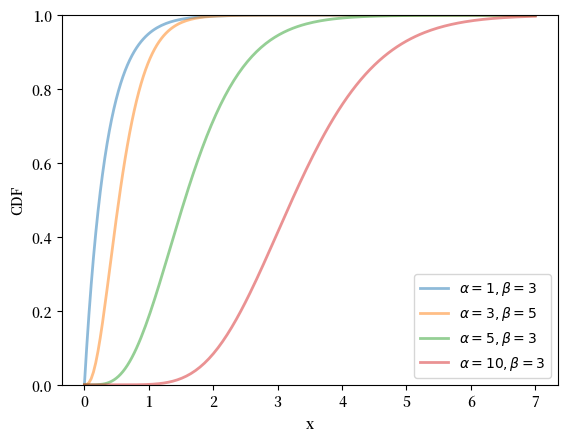

In [43]:
fig, ax = plt.subplots()
for α, β in zip(α_vals, β_vals):
    u = scipy.stats.gamma(α, scale=1/β)
    ax.plot(x_grid, u.cdf(x_grid),
    alpha=0.5, lw=2,
    label=fr'$\alpha={α}, \beta={β}$')
    ax.set_ylim(0, 1)
ax.set_xlabel('x')
ax.set_ylabel('CDF')
plt.legend()
plt.show()

## 观察到的分布

有时候我们将观测到的数据或测量值称为“分布”。

例如，假设我们观察了10个人一年的收入：

In [44]:
data = [['Hiroshi', 1200], 
        ['Ako', 1210], 
        ['Emi', 1400],
        ['Daiki', 990],
        ['Chiyo', 1530],
        ['Taka', 1210],
        ['Katsuhiko', 1240],
        ['Daisuke', 1124],
        ['Yoshi', 1330],
        ['Rie', 1340]]

df = pd.DataFrame(data, columns=['name', 'income'])
df

,name,income
0,Hiroshi,1200
1,Ako,1210
2,Emi,1400
3,Daiki,990
4,Chiyo,1530
5,Taka,1210
6,Katsuhiko,1240
7,Daisuke,1124
8,Yoshi,1330
9,Rie,1340


在这种情况下，我们可能称他们的收入集合为“收入分布”。

这个术语有些令人困惑，因为这个集合不是一个概率分布——它只是一个数字的集合。

然而，正如我们将看到的，观察到的分布（即，像上述收入分布那样的数字集合）和概率分布之间存在联系。

下面我们探索一些观察到的分布。


### 概括统计

假设我们有一个观察到的分布，其值为 $\{x_1, \ldots, x_n\}$

这个分布的**样本均值**定义为

$$
\bar x = \frac{1}{n} \sum_{i=1}^n x_i
$$

**样本方差**定义为 

$$
\frac{1}{n} \sum_{i=1}^n (x_i - \bar x)^2
$$

对于上面给出的收入分布，我们可以通过下面的方式计算这些数字：

In [45]:
x = df['income']
x.mean(), x.var()

(1257.4, 22680.933333333334)

```{exercise}
:label: prob_ex4

如果你尝试检查上述给出的样本均值和样本方差的公式是否能产生相同的数字，你会发现方差并不完全正确。这是因为SciPy使用的是 $1/(n-1)$ 而不是 $1/n$ 作为方差的前面的系数。（有些书籍就是这样定义样本方差的。）
确认。
```

### 可视化

让我们来看看我们可以用哪些方式来可视化一个或多个观察到的分布。

我们将讲解

- 直方图
- 核密度估计和
- 小提琴图


#### 直方图

我们可以如下制作我们刚刚建立的收入分布的直方图

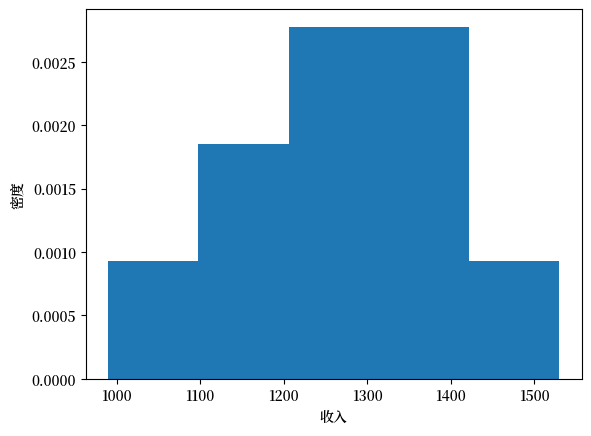

In [46]:
fig, ax = plt.subplots()
ax.hist(x, bins=5, density=True, histtype='bar')
ax.set_xlabel('收入')
ax.set_ylabel('密度')
plt.show()

让我们来看一个真实数据的分布。

特别是，我们将看一下2000/1/1至2024/1/1之间亚马逊股票的月收益率。

月收益率是每个月股价变动的百分比。

因此，我们将得到每个月的一个观测。

In [47]:
df = yf.download('AMZN', '2000-1-1', '2024-1-1', interval='1mo')
prices = df['Adj Close']
x_amazon = prices.pct_change()[1:] * 100
x_amazon.head()

[*********************100%***********************]  1 of 1 completed

Date
2000-02-01     6.679568
2000-03-01    -2.722323
2000-04-01   -17.630592
2000-05-01   -12.457531
2000-06-01   -24.838297
Name: Adj Close, dtype: float64

第一个观察结果是2000年1月的月回报（百分比变化），这是

In [48]:
x_amazon.iloc[0]

6.6795679502808625

让我们将回报观测值转换成数组并制作直方图。

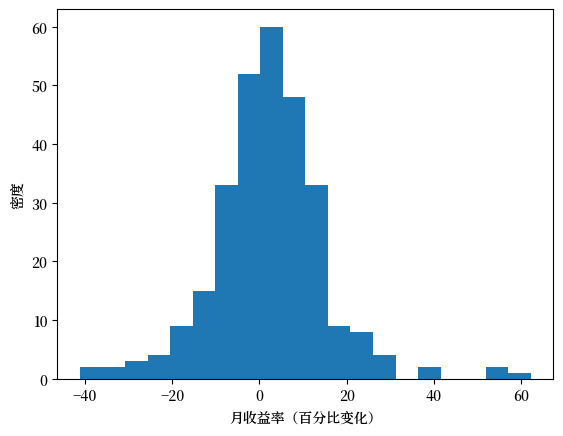

In [49]:
fig, ax = plt.subplots()
ax.hist(x_amazon, bins=20)
ax.set_xlabel('月收益率（百分比变化）')
ax.set_ylabel('密度')
plt.show()

#### 核密度估计

核密度估计（KDE）提供了一种简单的方式来估计和可视化分布的密度。

如果你不熟悉核密度估计，可以将其视为平滑的直方图。

让我们看看从亚马逊退货数据中形成的KDE。

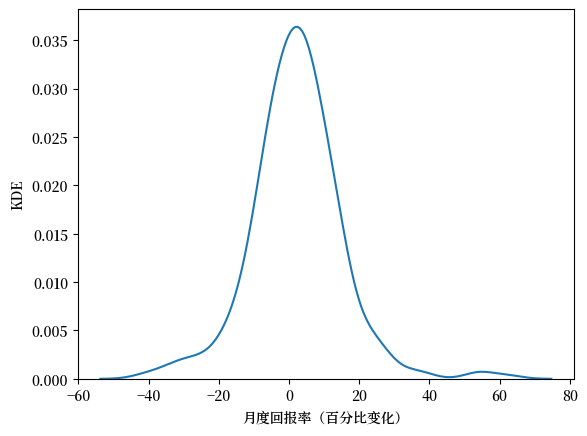

In [50]:
fig, ax = plt.subplots()
sns.kdeplot(x_amazon, ax=ax)
ax.set_xlabel('月度回报率（百分比变化）')
ax.set_ylabel('KDE')
plt.show()

KDE的平滑程度取决于我们选择带宽的方式。

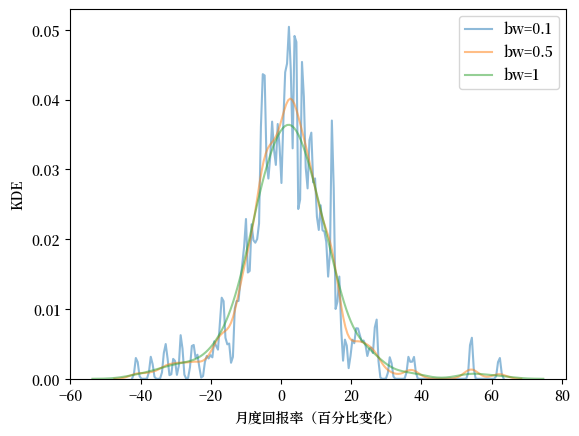

In [51]:
fig, ax = plt.subplots()
sns.kdeplot(x_amazon, ax=ax, bw_adjust=0.1, alpha=0.5, label="bw=0.1")
sns.kdeplot(x_amazon, ax=ax, bw_adjust=0.5, alpha=0.5, label="bw=0.5")
sns.kdeplot(x_amazon, ax=ax, bw_adjust=1, alpha=0.5, label="bw=1")
ax.set_xlabel('月度回报率（百分比变化）')
ax.set_ylabel('KDE')
plt.legend()
plt.show()

当我们使用较大的带宽时，KDE更加平滑。

一个合适的带宽既不应过于平滑（欠拟合），也不应过于曲折（过拟合）。


#### 小提琴图


通过小提琴图展示观察到的分布是另一种方式。

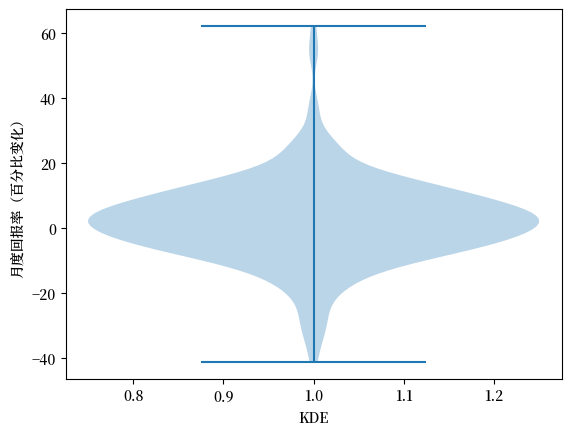

In [52]:
fig, ax = plt.subplots()
ax.violinplot(x_amazon)
ax.set_ylabel('月度回报率（百分比变化）')
ax.set_xlabel('KDE')
plt.show()

小提琴图在我们想要比较不同分布时特别有用。

例如，让我们比较亚马逊股份的月度回报与Costco股份的月度回报。

In [53]:
df = yf.download('COST', '2000-1-1', '2024-1-1', interval='1mo')
prices = df['Adj Close']
x_costco = prices.pct_change()[1:] * 100

[*********************100%***********************]  1 of 1 completed

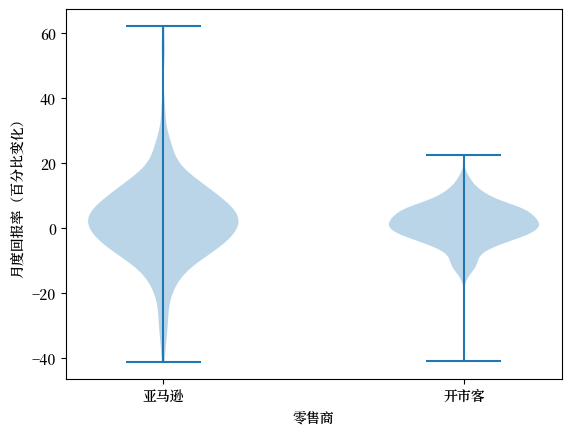

In [54]:
fig, ax = plt.subplots()
ax.violinplot([x_amazon, x_costco])
ax.set_ylabel('月度回报率（百分比变化）')
ax.set_xlabel('零售商')

ax.set_xticks([1, 2])
ax.set_xticklabels(['亚马逊', '开市客'])
plt.show()

### 与概率分布的联系

让我们讨论一下观察到的分布与概率分布之间的联系。

有时候，想象一个观察到的分布是由特定的概率分布生成的会很有帮助。

例如，我们可能会观察上面亚马逊的回报，并想象它们是由正态分布生成的。

（尽管这不是真的，但这*可能*是一种有帮助的思考数据的方式。）

这里我们通过将样本均值设为正态分布的均值，将样本方差设为方差，来匹配正态分布到亚马逊月度回报上。

然后我们绘制密度和直方图。

In [55]:
μ = x_amazon.mean()  
σ_squared = x_amazon.var()  
σ = np.sqrt(σ_squared)  
u = scipy.stats.norm(μ, σ)  

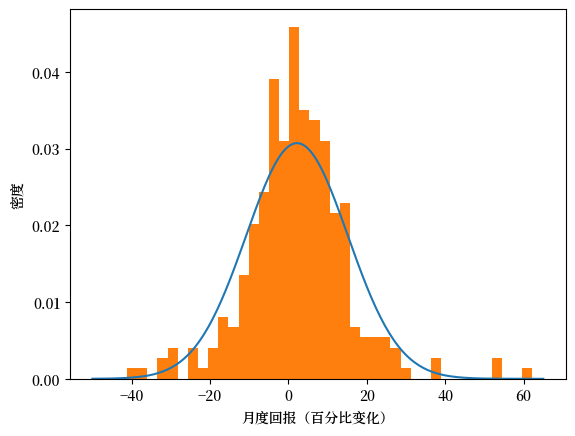

In [56]:
x_grid = np.linspace(-50, 65, 200)  
fig, ax = plt.subplots()  
ax.plot(x_grid, u.pdf(x_grid))  
ax.hist(x_amazon, density=True, bins=40)  
ax.set_xlabel('月度回报（百分比变化）')
ax.set_ylabel('密度')
plt.show()

直方图与密度的匹配不错，但也不是很好。

一个原因是正态分布实际上并不真正适合这个观察数据 --- 我们在讨论{ref}`重尾分布<heavy_tail>`时将再次提到这一点。

当然，如果数据真的是由正态分布生成的，那么拟合效果会更好。

让我们看到这一点在实际中的运用：

- 首先我们从正态分布中生成随机抽样
- 然后我们对它们进行直方图绘制，并与密度比较。

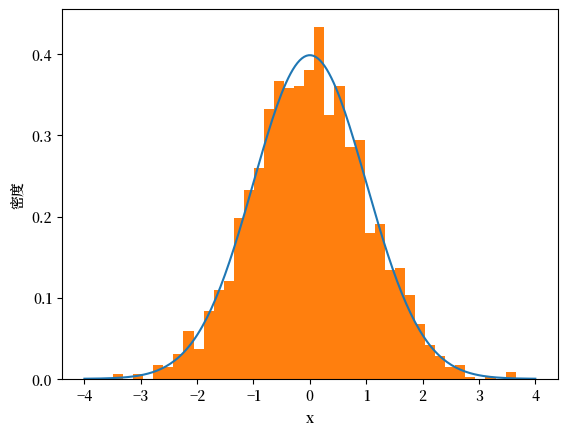

In [57]:
μ, σ = 0, 1  
u = scipy.stats.norm(μ, σ)  
N = 2000  
x_draws = u.rvs(N)  
x_grid = np.linspace(-4, 4, 200)  
fig, ax = plt.subplots()  
ax.plot(x_grid, u.pdf(x_grid))  
ax.hist(x_draws, density=True, bins=40)  
ax.set_xlabel('x')
ax.set_ylabel('密度')
plt.show()

请注意，如果你不断增加 $N$，即观测数量，拟合效果会越来越好。

这种收敛是“大数定律”的一个版本，我们将在{ref}`以后<lln_mr>`讨论。